In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [48]:
df = pd.read_csv('default_of_credit_card_clients.csv')
df.drop(columns=['ID'],inplace=True)
target = 'default_payment_next_month'
target_rename = 'default'
df.rename(columns={target:target_rename}, inplace=True)
target=target_rename
feat_disc_threshold = 11
feat_discrete = [col for col in df.columns if getattr(df, col).nunique() <= feat_disc_threshold and col != target]
feat_continous = [col for col in df.columns if col not in feat_discrete and col != target]

In [68]:
df_disct = df.copy()
cat = 9
for col in feat_continous:
    gap = (getattr(df_disct, col).max() - getattr(df_disct, col).min())//cat
    df_disct[col] = ((getattr(df_disct, col) - getattr(df_disct, col).min()) / gap)
df_disct.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,0.090909,2,2,1,0.500000,2,2,-1,-1,-2,...,1.441240,0.725834,2.348812,0.000000,0.003682,0.000000,0.000000,0.000000,0.000000,1
1,1.000000,2,2,2,0.833333,-1,2,0,0,0,...,1.468979,0.756666,2.371366,0.000000,0.005344,0.010044,0.014493,0.000000,0.034048,1
2,0.727273,2,2,2,2.166667,0,0,0,0,0,...,1.562736,0.859231,2.456354,0.015640,0.008015,0.010044,0.014493,0.021101,0.085121,0
3,0.363636,2,2,1,2.666667,0,0,0,0,0,...,1.681283,0.984267,2.553169,0.020606,0.010789,0.012053,0.015942,0.022557,0.017024,0
4,0.363636,1,2,1,6.000000,-1,0,-1,0,0,...,1.618767,0.896695,2.481129,0.020606,0.196009,0.100442,0.130435,0.014538,0.011559,0


In [70]:
df_disct.PAY_6.min()

-2

<AxesSubplot: >

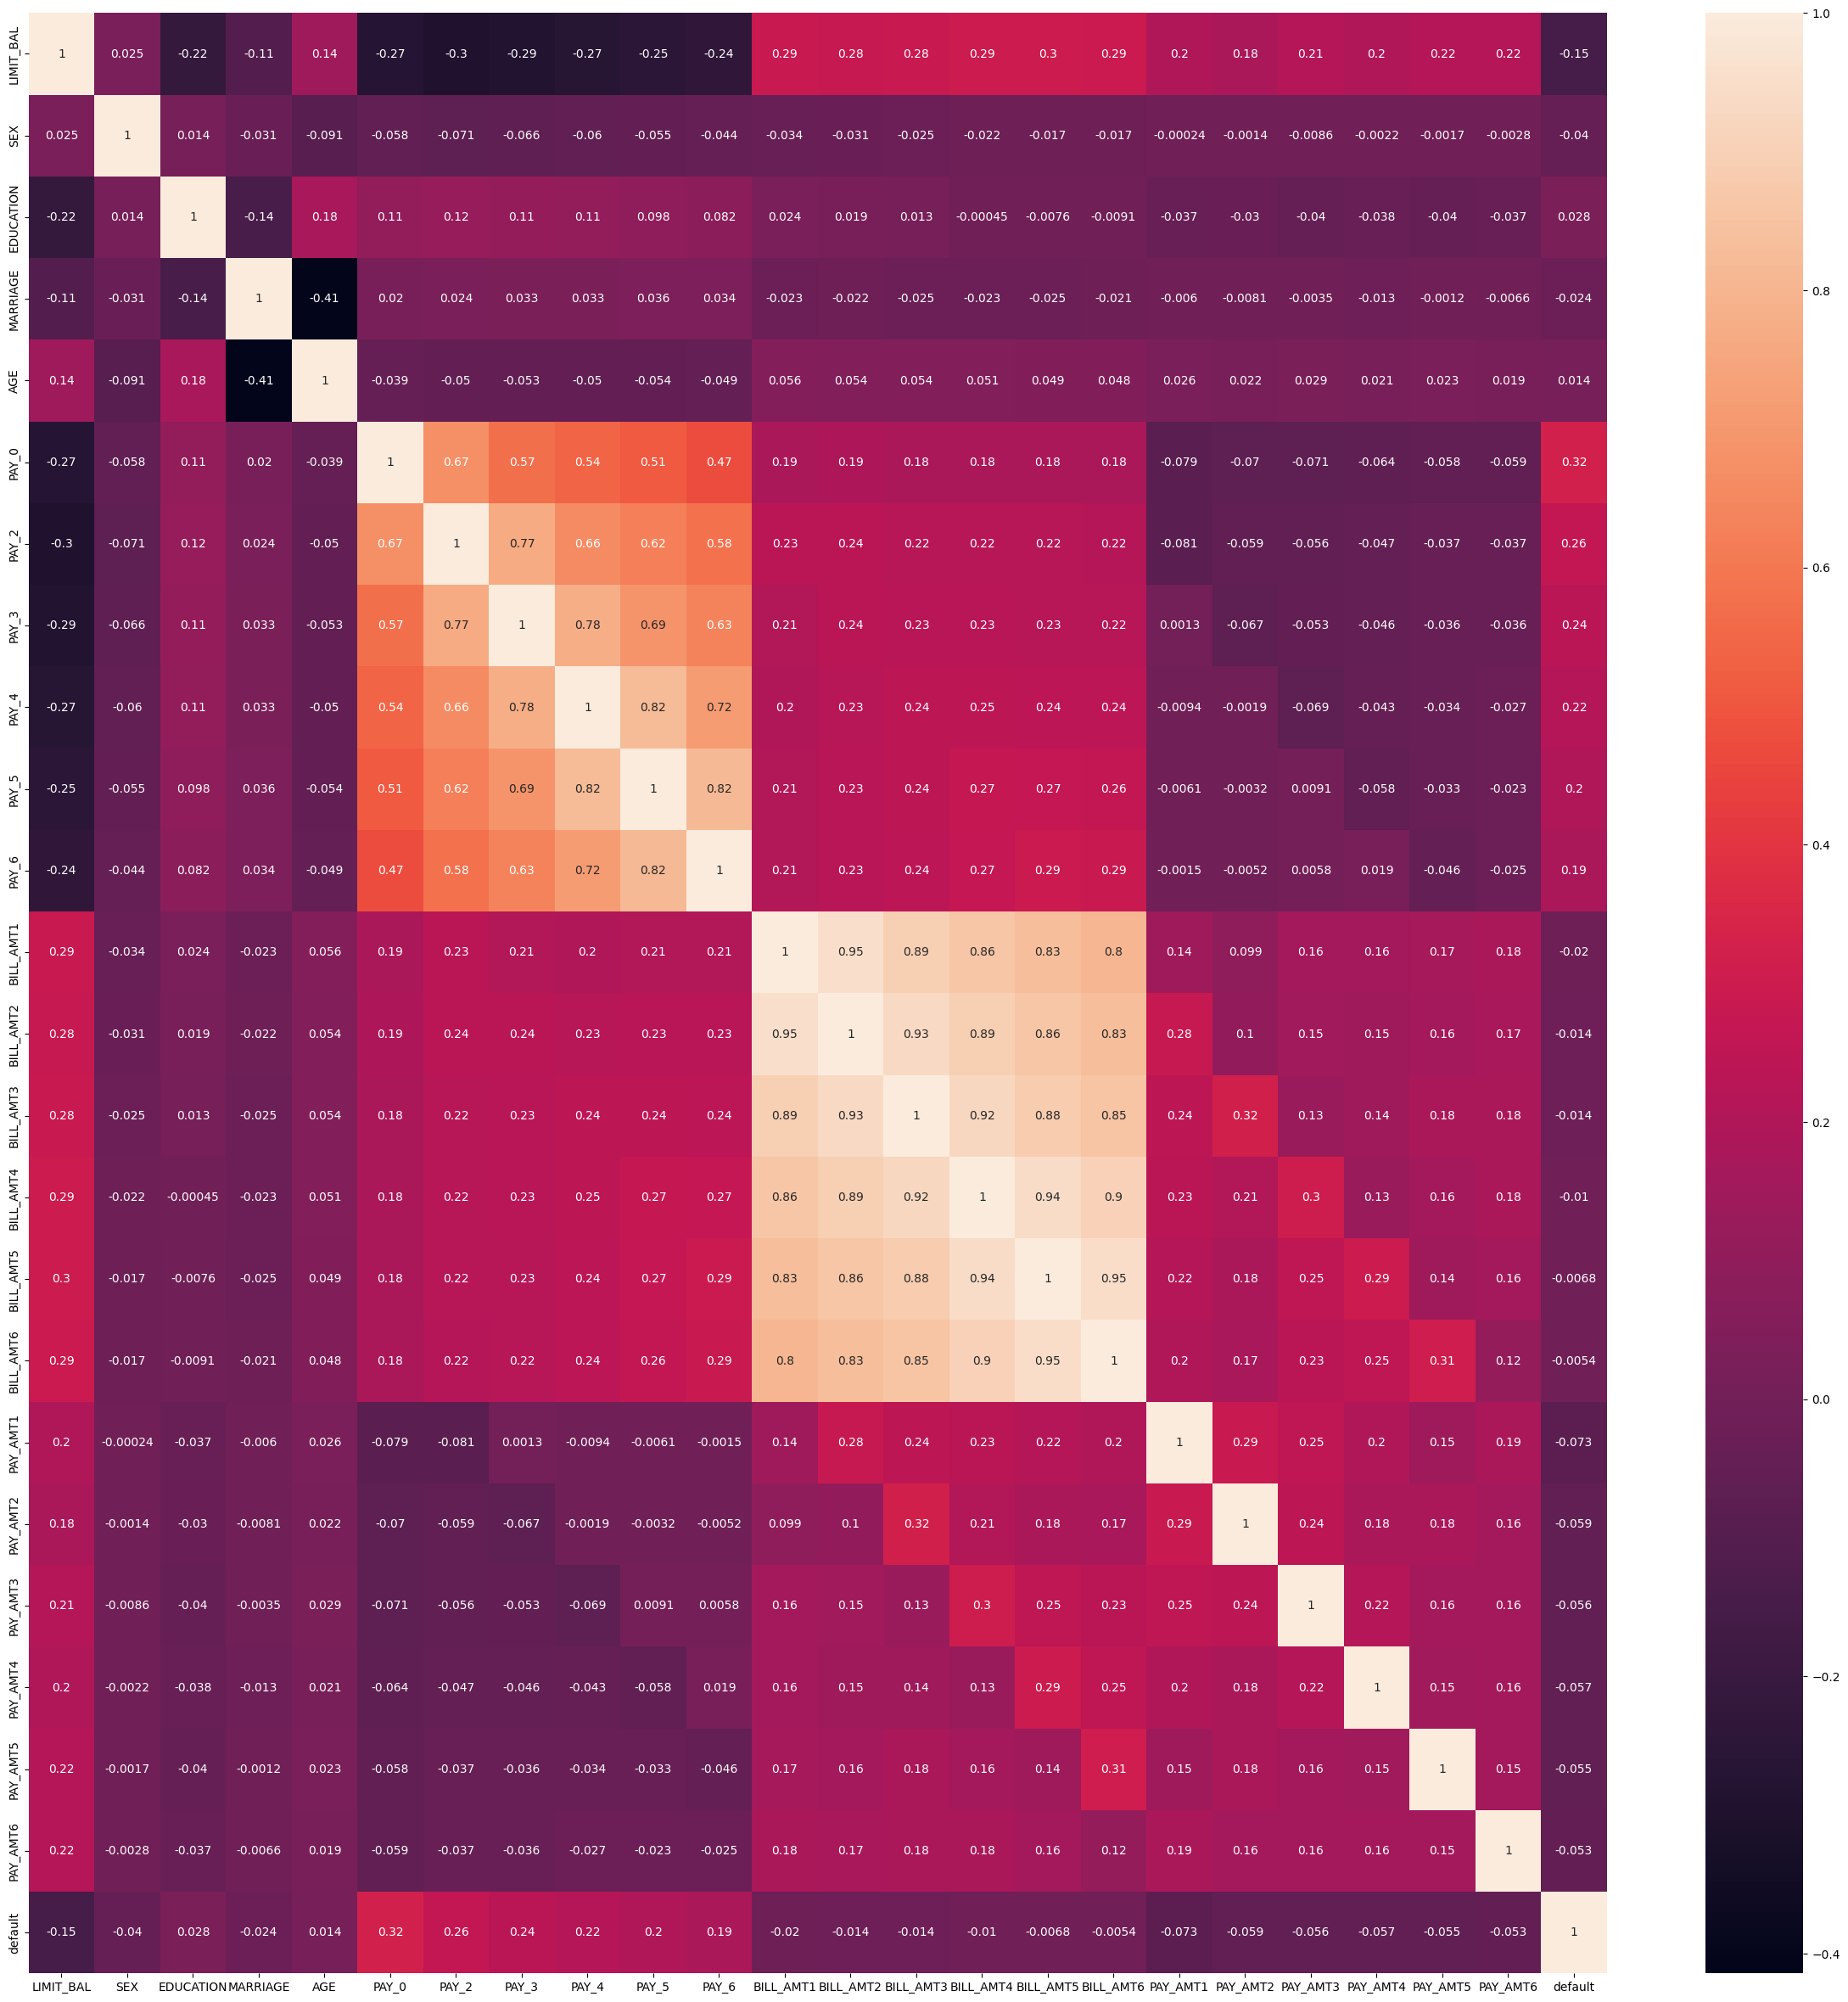

In [54]:
plt.subplots(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)